In [5]:
import os
import sys
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
from scipy import poly1d
from datetime import datetime
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
from binance import BINANCE_START_DATE, request_spot_tickers, dump_spot_candles
from ops import *
from simulator import Simulator

%matplotlib inline

Задание на "автомат" по практике: сконструировать альфа-сигнал на основе фильтра Калмана на скользящем окне размером 24*7

In [6]:
DATA_DIR = '/home/ezavalnyuk/git/sirius_algo/data'

In [11]:
price = pd.read_parquet(os.path.join(DATA_DIR,'spot','BTC-USDT.parquet'))['close']

In [12]:
price

0         4308.83
1         4315.32
2         4324.35
3         4349.99
4         4360.69
           ...   
46232    17062.85
46233    17097.19
46234    17106.65
46235    17148.29
46236    17163.64
Name: close, Length: 46237, dtype: float64

In [15]:
kf = KalmanFilter(
    transition_matrices = [1],
    observation_matrices = [1],
    initial_state_mean = 0,
    initial_state_covariance = 1,
    observation_covariance = 1,
    transition_covariance = 0.0001
)

In [23]:
mean, cov = kf.filter(price[:10000])
mean, std = mean.squeeze(), np.std(cov.squeeze())

<AxesSubplot:>

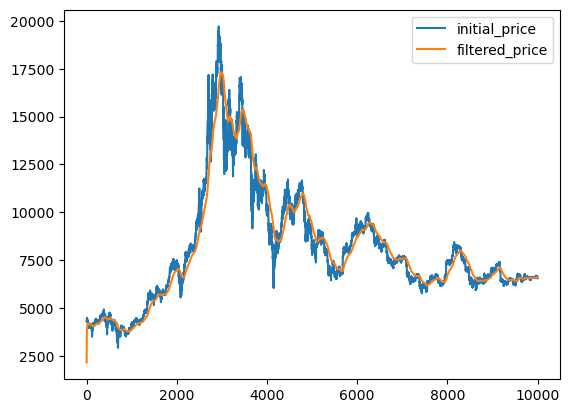

In [24]:
pd.DataFrame({
    'initial_price' : price[:10000],
    'filtered_price' : mean,
}).plot()